<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_03/Lecture_01/BonusActivity/01_24_22_SOLUTION_Clean_and_Univariate_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clean and Univariate Challenge (Solutions)

You are going to clean the data and then create exploratory visualizations.

Be sure to answer the questions along the way too!

These visualizions are for YOU (the data scientist) and not for presentation to others.



You don't need to make any of these vizzes fancy! Think of them as notes as you explore and begin to understand your data!

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

1) Read in the Raw_Medical_Data.csv and take a look at the first 5 entries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Coding Dojo/Lectures - Live Class Materials/Stack 1/Week 3/Raw_Medical_Data_for_day1.xlsx'
df = pd.read_excel(path)
df.head()

,Unnamed: 0,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


2) After verifying that you have the correct dataset with df.head(), think of some other code you should start with to "get a feel" for your data.  Share different options with your group to find answers to the following questions:

2a) How many rows?

2b) How many columns?

2c) What is the datatype of the "HighBlood" column?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   State               1000 non-null   object 
 2   Lat                 1000 non-null   float64
 3   Lng                 1000 non-null   float64
 4   Area                1000 non-null   object 
 5   Children            993 non-null    float64
 6   Age                 1000 non-null   int64  
 7   Income              1000 non-null   float64
 8   Marital             1000 non-null   object 
 9   Gender              1000 non-null   object 
 10  ReAdmis             1000 non-null   int64  
 11  VitD_levels         1000 non-null   float64
 12  Doc_visits          1000 non-null   int64  
 13  Full_meals_eaten    1000 non-null   int64  
 14  vitD_supp           1000 non-null   int64  
 15  Soft_drink          1000 non-null   int64  
 16  Initial

There are 33 columns, 1000 rows, and the data type of HighBlood is an integer.

3) Before you start tackling the code, make a list with your group of as many things as you can think of to address when cleaning.  

Answer to 3) Identify extra columns

fix datatypes

identify duplicates

check valuecounts and fix inconsistencies column by column

identify missing values

correct, drop, or impute missing values

identify outliers (make note of them


4a) Drop the Unnamed: 0 column and the full meals eaten column.

4b) Rename the TotalCharges column to Base_charge

In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'Full_meals_eaten'])

In [ ]:
df.rename(columns = {'TotalCharge': 'Base_charge'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1000 non-null   object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                1000 non-null   object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             1000 non-null   object 
 8   Gender              1000 non-null   object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  vitD_supp           1000 non-null   int64  
 13  Soft_drink          1000 non-null   int64  
 14  Initial_admin       1000 non-null   object 
 15  HighBlood           1000 non-null   int64  
 16  Stroke 

5a) Find and correct inconsistencies in category labels. 

In [ ]:
df.State.value_counts()

TX    54
CA    52
NY    52
OH    49
PA    45
IL    41
FL    35
VA    34
KS    32
IA    30
MN    28
WV    28
OK    27
MI    27
MO    26
NC    26
WI    22
NJ    22
WA    19
NE    19
TN    19
KY    19
AL    19
IN    18
OR    18
AR    18
GA    16
ME    14
AZ    14
MS    14
NM    12
SD    12
ND    11
ID    11
MA    11
CO    11
NH    11
SC    11
AK    10
LA    10
MD    10
MT     9
CT     9
VT     5
UT     5
RI     3
PR     3
NV     3
DC     2
WY     2
HI     2
Name: State, dtype: int64

In [ ]:
df.Area.value_counts()

Rural       349
Urban       337
Suburban    314
Name: Area, dtype: int64

In [ ]:
df.Marital.value_counts()

Divorced         207
Married          206
Widowed          201
Never Married    200
Separated        186
Name: Marital, dtype: int64

In [ ]:
df.Gender.value_counts()

Female       516
Male         454
Nonbinary     21
m              3
F              2
male           2
f              1
M              1
Name: Gender, dtype: int64

In [ ]:
# We have inconsistencies in the labeling in the gender category
# You can address these one at a time 
df['Gender'].replace('male', 'Male', inplace = True)

In [ ]:
# you could create a variable containing multiple values you need to change
wrong_Male = ['m', 'M'] 

In [ ]:
df['Gender'].replace(wrong_Male, 'Male', inplace = True) 

In [ ]:
df.Gender.value_counts()

Female       516
Male         460
Nonbinary     21
F              2
f              1
Name: Gender, dtype: int64

In [ ]:
# You could put multiple values directly in the .replace argument with []
df['Gender'].replace([' Female', 'f', 'F'], 'Female', inplace = True)

In [ ]:
df['Gender'].value_counts()

Female       519
Male         460
Nonbinary     21
Name: Gender, dtype: int64

In [ ]:
df['Initial_admin'].value_counts()

Emergency Admission      504
Elective Admission       264
Observation Admission    232
Name: Initial_admin, dtype: int64

In [ ]:
df['Complication_risk'].value_counts()

Medium    462
High      312
Low       222
Med         4
Name: Complication_risk, dtype: int64

In [ ]:
df['Complication_risk'].replace('Med', 'Medium', inplace = True)
df['Complication_risk'].value_counts()

Medium    466
High      312
Low       222
Name: Complication_risk, dtype: int64

In [ ]:
df['Services'].value_counts()

Blood Work     529
Intravenous    331
CT Scan        104
MRI             36
Name: Services, dtype: int64

6) Identify and drop any duplicates

In [ ]:
df.duplicated().any()

False

7) Identify missing values and discuss options to address missing values. Decide on a method, and address these values!

In [ ]:
df.isnull().sum()

State                 0
Lat                   0
Lng                   0
Area                  0
Children              7
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
Base_charge           0
Additional_charges    0
dtype: int64

In [ ]:
missing = df.isnull()
num_missing = missing.sum()
num_missing

State                 0
Lat                   0
Lng                   0
Area                  0
Children              7
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
Base_charge           0
Additional_charges    0
dtype: int64

In [ ]:
(num_missing / len(df)) * 100

State                 0.0
Lat                   0.0
Lng                   0.0
Area                  0.0
Children              0.7
Age                   0.0
Income                0.0
Marital               0.0
Gender                0.0
ReAdmis               0.0
VitD_levels           0.0
Doc_visits            0.0
vitD_supp             0.0
Soft_drink            0.0
Initial_admin         0.0
HighBlood             0.0
Stroke                0.0
Complication_risk     0.0
Overweight            0.0
Arthritis             0.6
Diabetes              0.6
Hyperlipidemia        0.2
BackPain              0.8
Anxiety               0.2
Allergic_rhinitis     0.6
Reflux_esophagitis    0.0
Asthma                0.0
Services              0.0
Initial_days          0.0
Base_charge           0.0
Additional_charges    0.0
dtype: float64

In [ ]:
# since less than 5% (in fact, less than 1% of data is missing from any feature, I will just drop all na values)
df.dropna(inplace = True)

In [ ]:
len(df)  # We dropped a total of 37 rows which is dropping 37/1000 = 3.7% total patients dropped

963

Save your cleaned dataset to disk so you can use it later without cleaning it again.

In [ ]:
df.to_excel('Med_cleaned.xlsx')

8) Distributions can be very helpful for exploring your data.

For categorical data, use the value_counts to give the count of each category on the y axis.

Make a bar chart of the Complication_risk data.

Which risk level is the most common in our dataset?

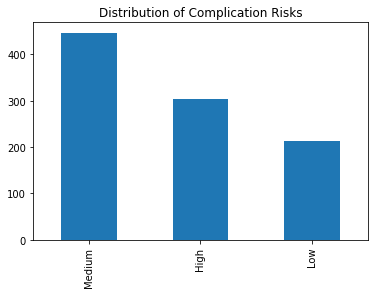

In [ ]:
df['Complication_risk'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Complication Risks')
plt.show()

9) Create a histogram of 'Base_charge' with 20 bins.  How would you describe the distribution?  

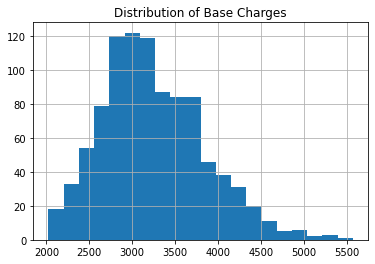

In [ ]:
df['Base_charge'].hist(bins=20)
plt.title('Distribution of Base Charges')
plt.show()

The distribution is centered around a 3000, but with a slight right skew.

10) First, use df['column'].describe() to obtain some summary statistics of the income column.

What is the average income?

What are the minimum and maximum incomes?

About what percentage of the patients made at or more than about $55,000 a year? (Hint, it is NOT 75%)

In [ ]:
df['Income'].describe()

count       963.000000
mean      40540.748754
std       27984.106279
min         154.080000
25%       19155.115000
50%       34192.000000
75%       54986.885000
max      178470.630000
Name: Income, dtype: float64

Answer:
The mean average income is 40,540 with a minimum of 154 and a maximum of 178,470.  About 25% of patiences made over 55k per year.

11) A common visual approach to summary statistics is the boxplot.  

Boxplots are particularly good at helping you identify the presence of outliers.

Make a boxplot of the Income column and discuss your findings. 

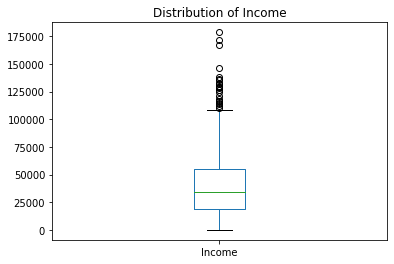

In [ ]:
df.boxplot(column = 'Income', grid = False)
plt.title('Distribution of Income')
plt.show()

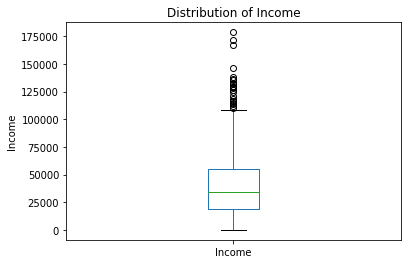

In [ ]:
#Boxplot of Income
df['Income'].plot(kind='box')
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.show()

Answer:
We see a medium income of about 35k, but with several outliers above 100k and three over 150k.

Bonus! Continue to explore the data and practice making visualizations!